## Objective

The objective of this notebook is to segment the population of passengers into clusters in order to identify those segments that were most likely to survive based on their feature characteristics.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data
df = pd.read_csv('./titanic.csv')

# Drop unnecessary columns
df = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

# Separate target for later comparison
survival = df['Survived']
df = df.drop('Survived', axis=1)

# Define preprocessing steps
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = ['Sex', 'Embarked', 'Pclass']

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Apply transformations
X = preprocessor.fit_transform(df)

X.shape, len(df.columns)

((891, 12), 7)

In [37]:
scores = []

for i in range(1, 20):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  scores.append(kmeans.inertia_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

Text(0, 0.5, 'Scores')

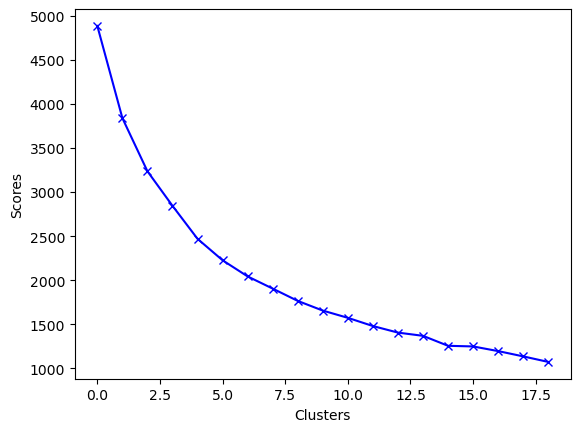

In [38]:
plt.plot(scores, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('Scores')

In [53]:
kmeans = KMeans(6)
kmeans.fit(X)
labels = kmeans.labels_
labels.shape

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(891,)

In [48]:
df['Cluster'] = labels
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cluster
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,2
2,3,female,26.0,0,0,7.9250,S,5
3,1,female,35.0,1,0,53.1000,S,5
4,3,male,35.0,0,0,8.0500,S,0


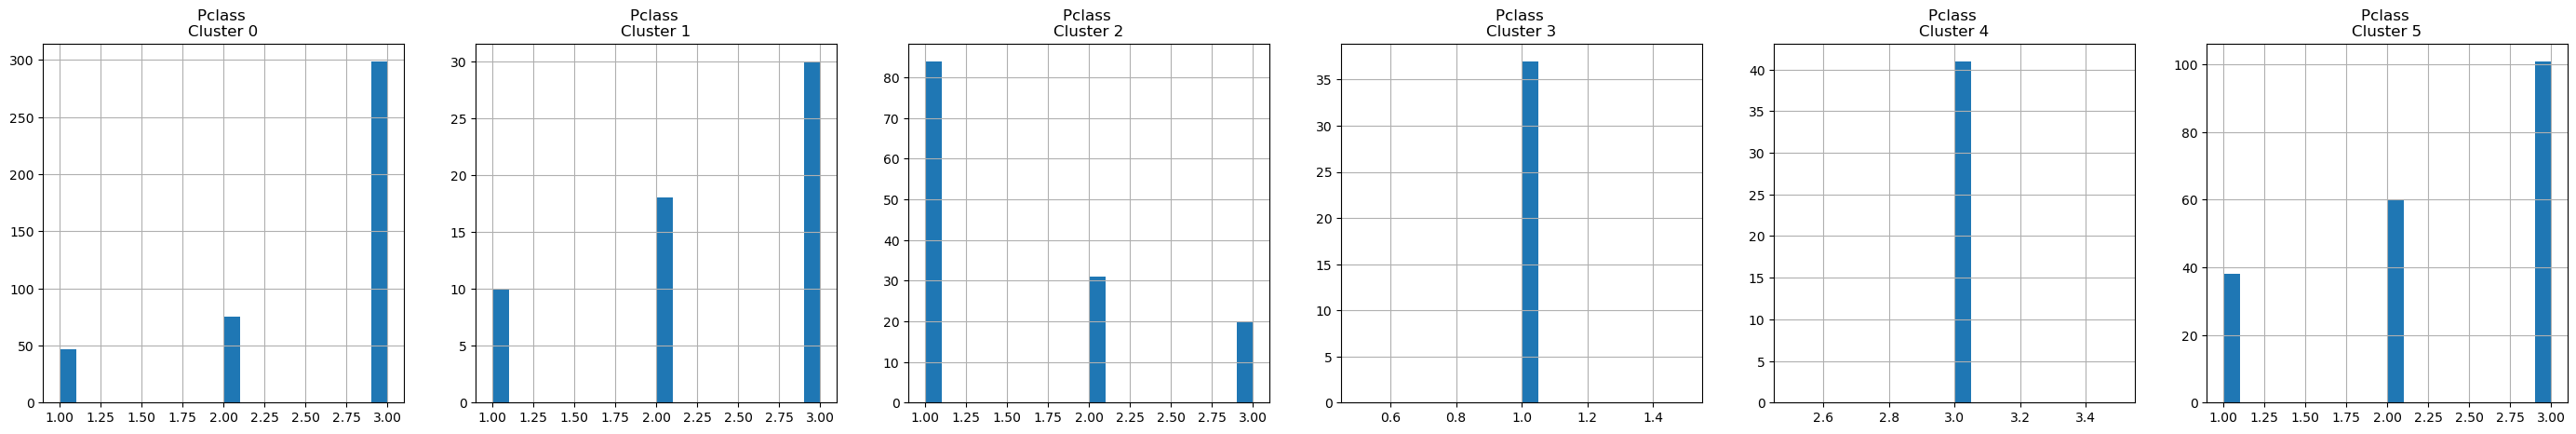

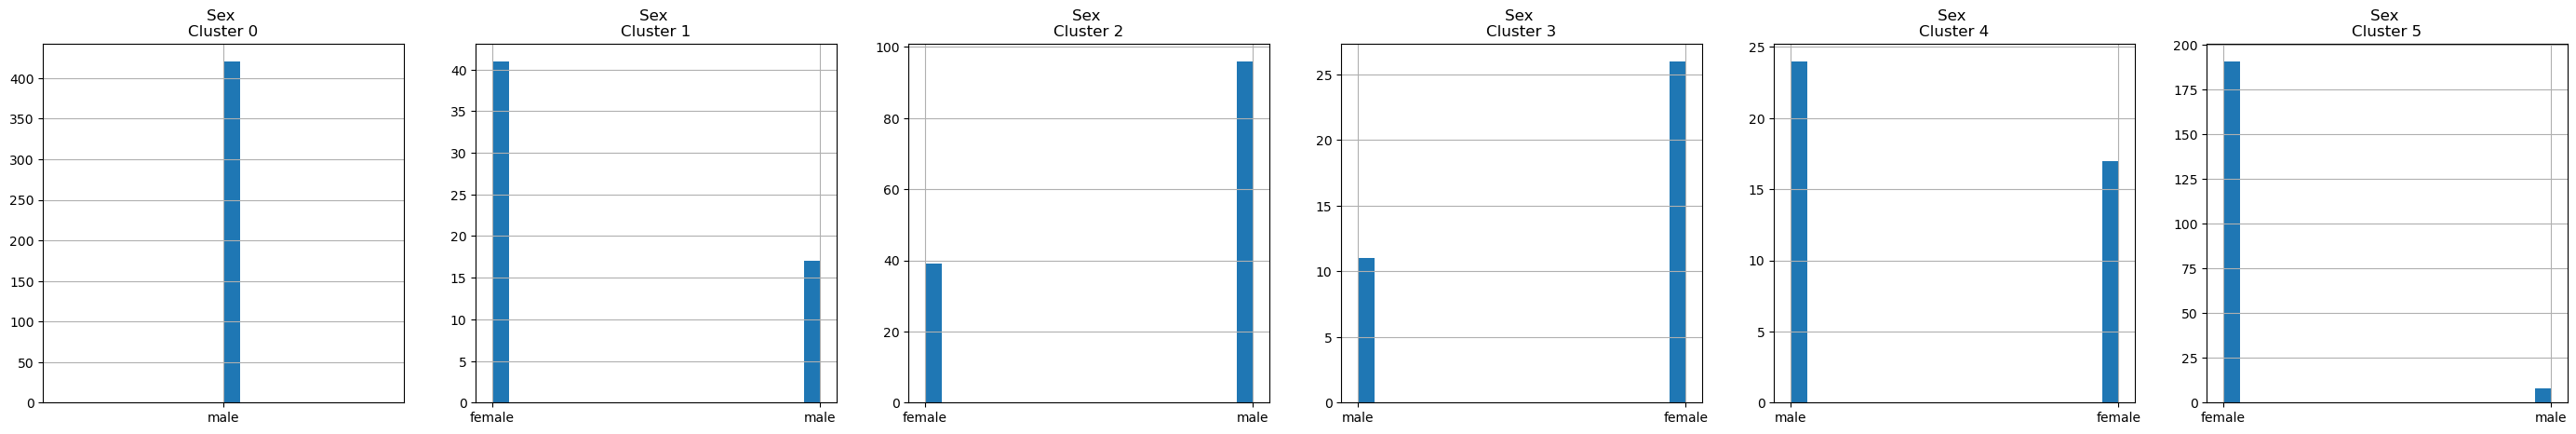

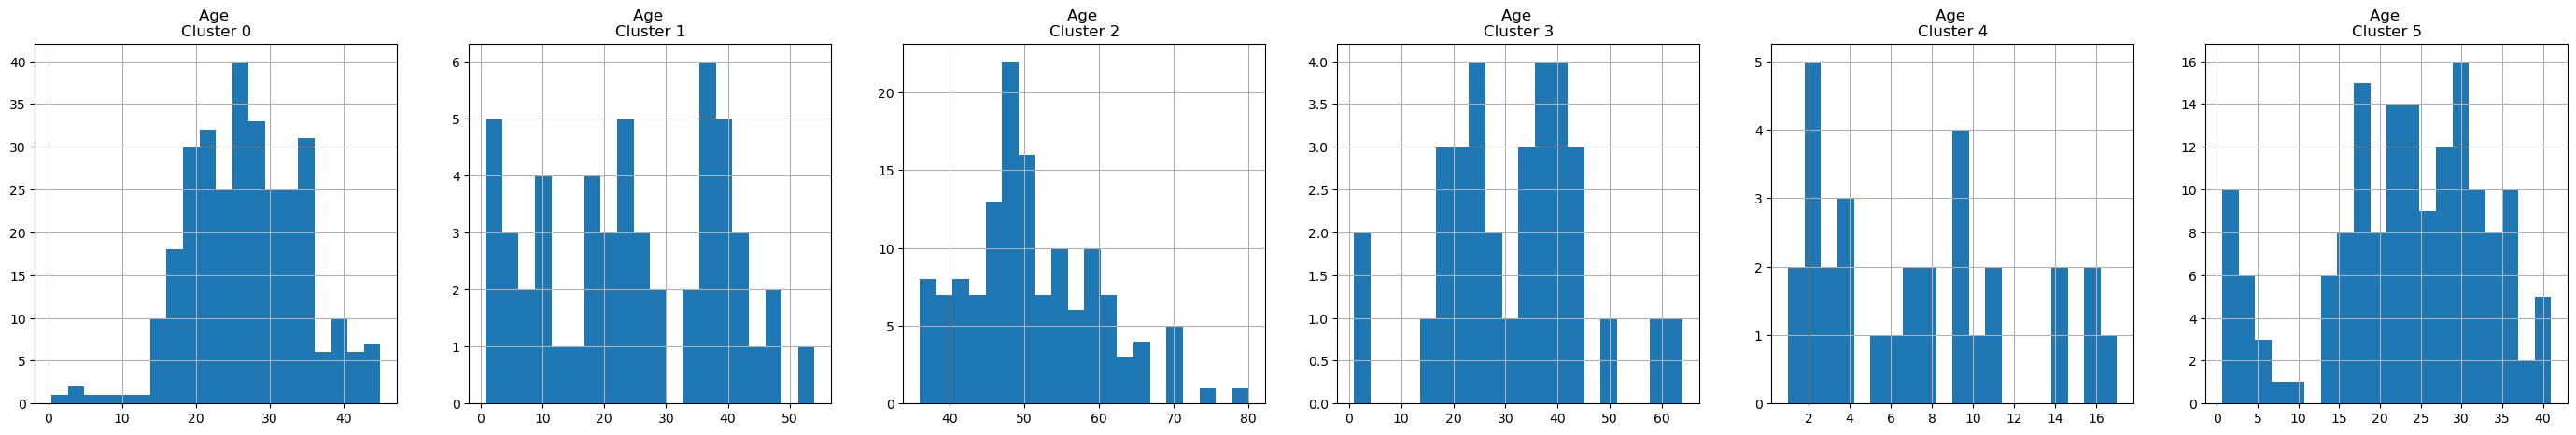

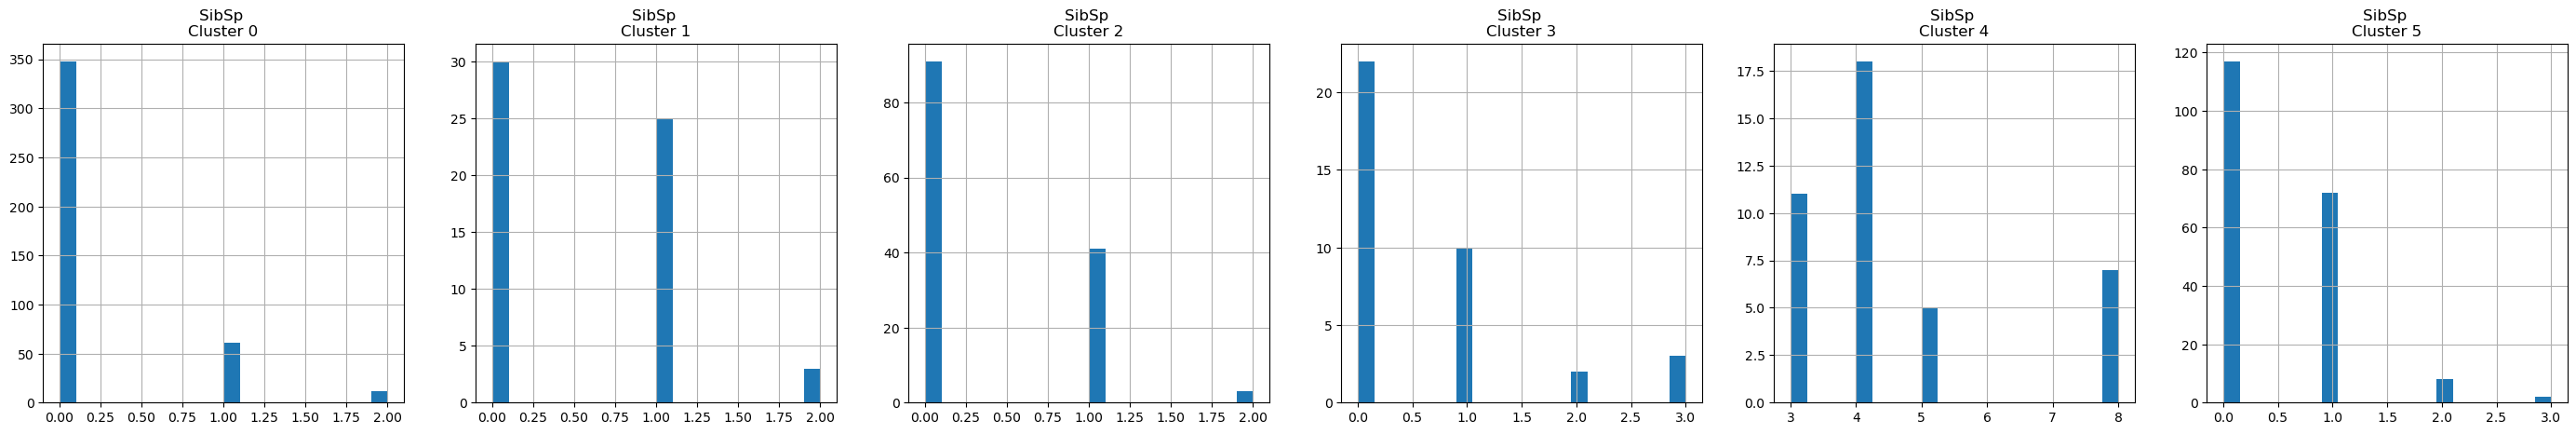

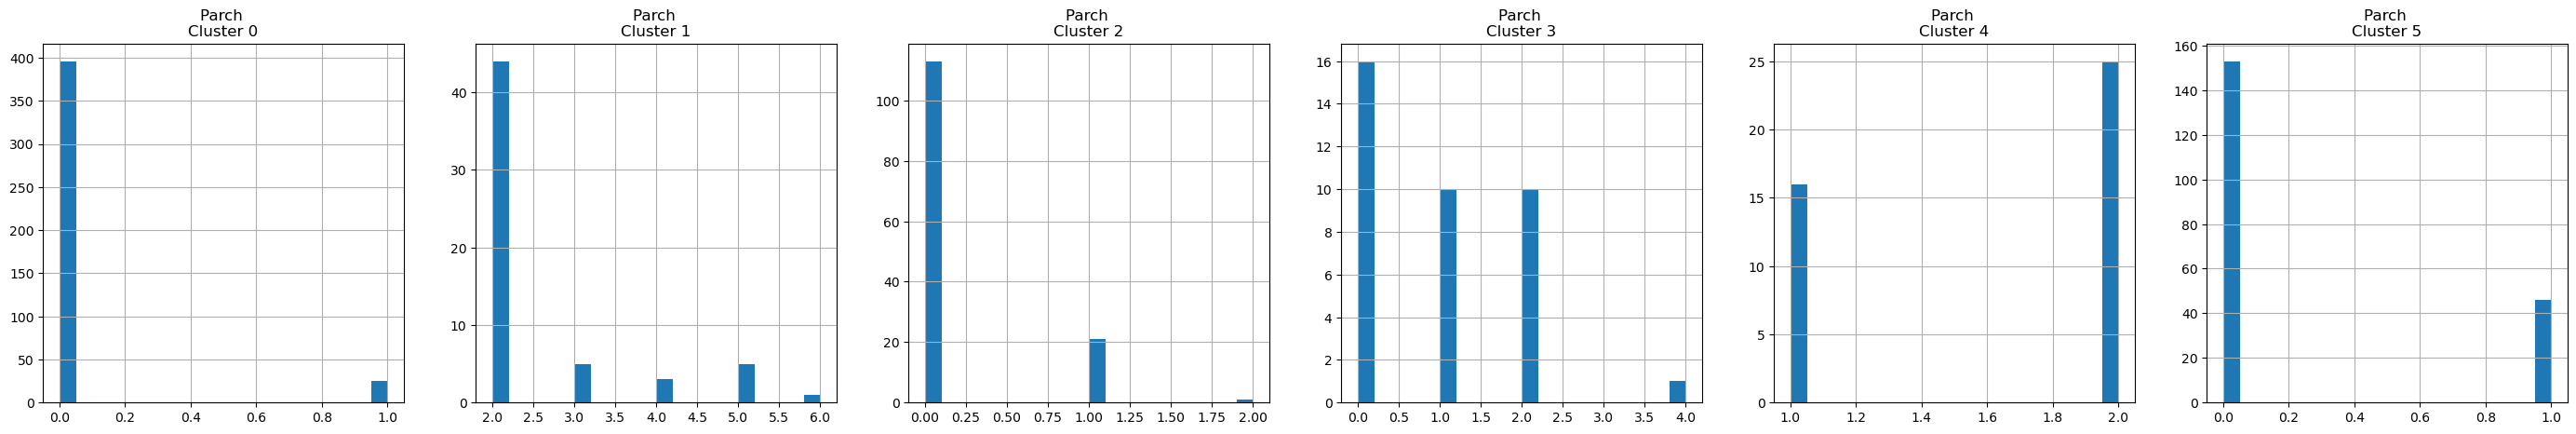

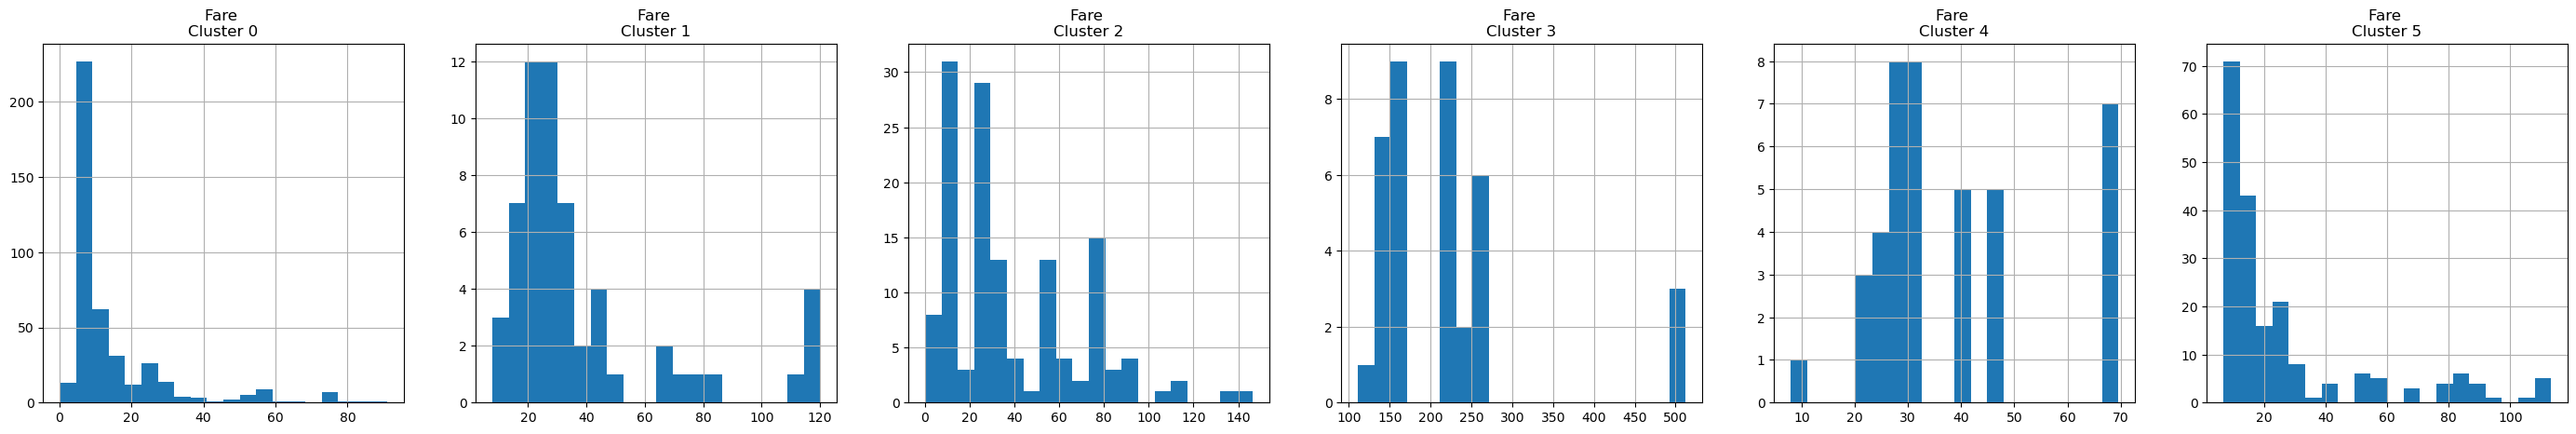

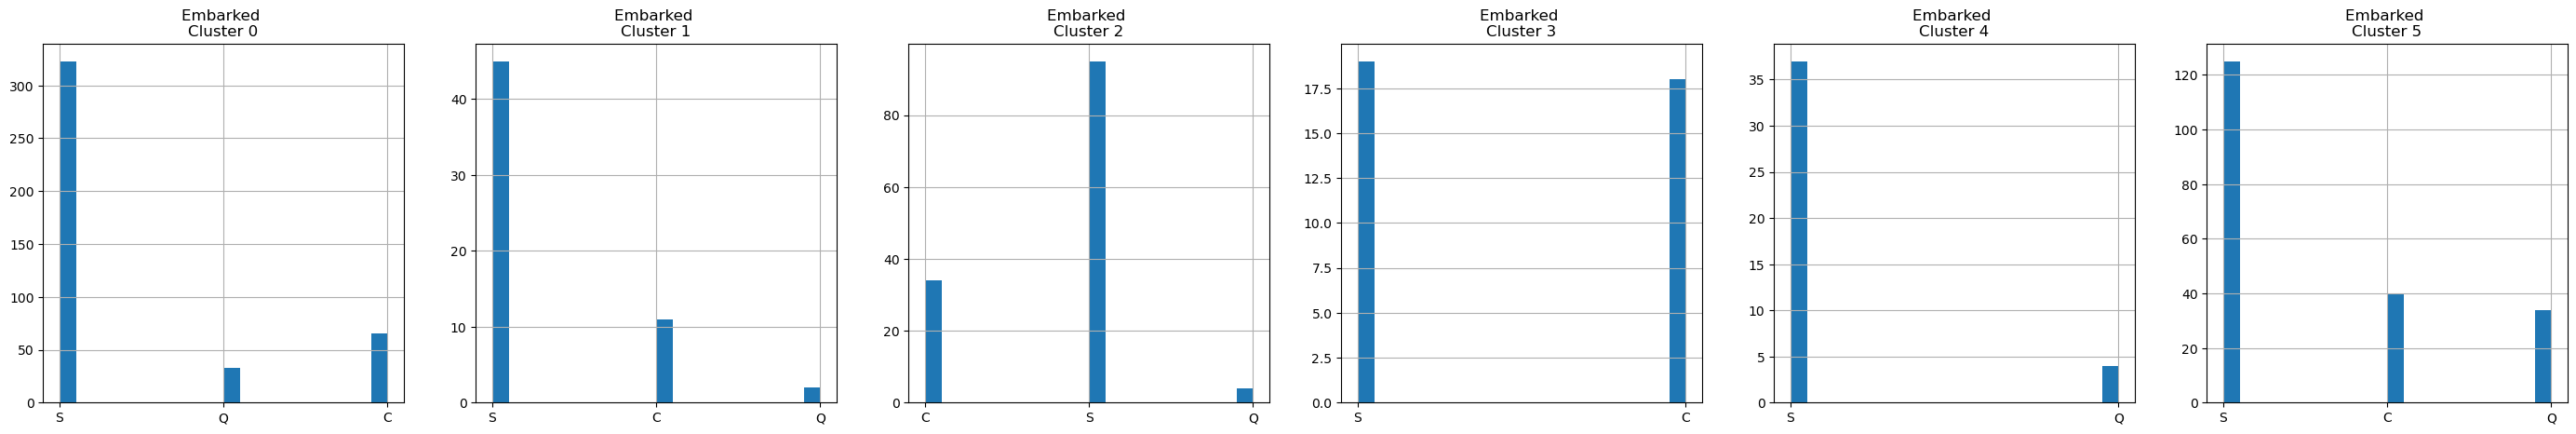

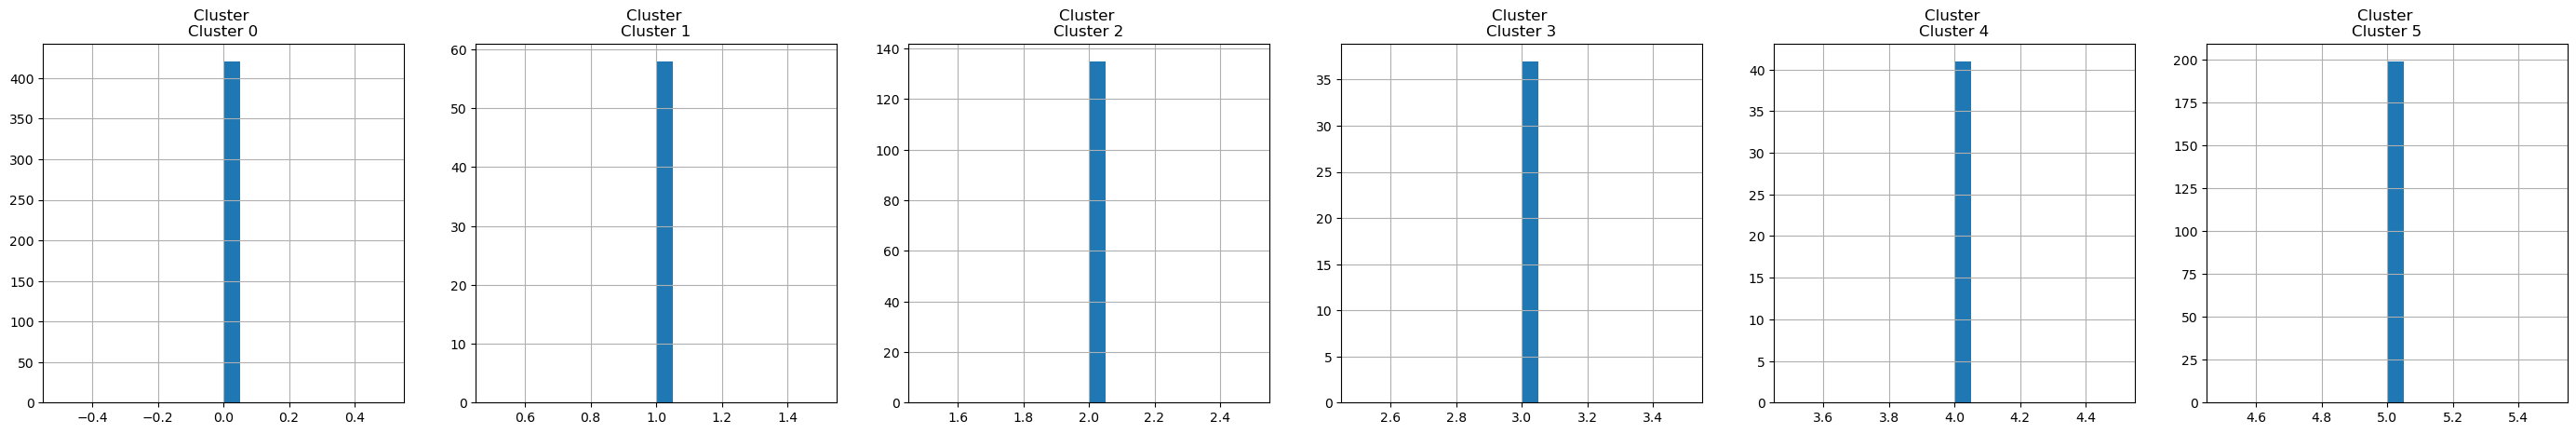

In [49]:
for i in df.columns:
  plt.figure(figsize=(35, 5))
  for j in range(6):
    plt.subplot(1, 6, j+1)
    cluster = df[df['Cluster'] == j]
    cluster[i].hist(bins=20)
    plt.title(f'{i} \nCluster {j}')
plt.show()

In [83]:
df['Survived'] = survival
df['Norm Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [81]:
numerical_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Norm Sex', 'Survived']
group_col = 'Cluster'

cluster_means = df.groupby(group_col)[numerical_cols].mean()
cluster_means

,Pclass,Age,SibSp,Parch,Fare,Norm Sex,Survived
Cluster,,,,,,,
0,2.598575,26.835803,0.201900,0.059382,15.052085,1.000000,0.168646
1,2.344828,24.506226,0.534483,2.517241,38.169610,0.293103,0.603448
2,1.525926,51.037037,0.348148,0.170370,39.227379,0.711111,0.385185
3,1.000000,31.391515,0.621622,0.918919,217.552589,0.297297,0.729730
4,3.000000,7.200000,4.536585,1.609756,38.327849,0.585366,0.073171
5,2.316583,22.655063,0.472362,0.231156,26.264323,0.040201,0.773869


In [ ]:
for col in numerical_cols:
  plt.figure(figsize=(6, 4))
  sns.barplot(x=cluster_means.index, y=cluster_means[col])
  plt.title(f'Mean {col} by Cluster')
  plt.xlabel('Cluster')
  plt.ylabel(f'Mean {col}')
  plt.tight_layout()
  plt.show()

## Conclusion

### Cluster 0
Survival Rate: 16.8%

Description: This cohort represents men without families

### Cluster 1
Survival Rate: 60.3%

Description: This cluster represents women with children

### Cluster 2
Survival Rate: 38.5%

Description: This cluster represents older passengers, who were generally more well-off and most of whom did not have family on the ship

### Cluster 3
Survival Rate: 73.0%

Description: This represents prime age, upperclass passengers (all of whom had first class tickets)

### Cluster 4
Survival Rate: 7.3%

Description: This cluster represents poor children and the most likely to perish.

### Cluster 5
Survival Rate: 77.4%

Description: This represents all women without family on board, the most likely cohort to survive
